In [1]:
import numpy as np
import pandas as pd

from tabulate import tabulate

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inp0= pd.read_csv("./googleplaystore.csv")

In [3]:
print(inp0.keys())

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [4]:
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
inp0.dropna(how ='any', inplace = True)

In [6]:
inp0.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
inp0.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [8]:
#Modifying the column
inp0['Price'] = inp0.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [9]:
#Converting reviews to numeric
inp0.Reviews = inp0.Reviews.astype("int32")

In [10]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [11]:
#Handling the installs column
inp0.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [12]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))

In [13]:
inp0.Installs = inp0.Installs.map(clean_installs)

In [14]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [15]:
#Handling the app size field
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None

In [16]:
inp0["Size"] = inp0["Size"].map(change_size)

In [17]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [18]:
inp0.Size.fillna(method = 'ffill', inplace = True)

In [19]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
inp1 = inp0.copy()

In [21]:
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(9360, 9)

In [22]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [23]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [26]:
df_train.shape, df_test.shape

((6552, 157), (2808, 157))

In [27]:
y_train = df_train.pop("Rating")
x_train = df_train

In [28]:
x_train.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
2133,525552,48000.0,10000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y_test = df_test.pop("Rating")
x_test = df_test

In [30]:
x_test.head(1)

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
356,2473509,5100.0,100000000,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import statsmodels.api as sm

In [33]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
train_data=pd.DataFrame(x_train)
train_data['Rating']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,Rating
0,0.008685,1.072461,-0.085702,-0.062649,-0.086804,-0.070057,-0.140028,-0.181521,-0.073284,-0.192023,...,-0.012355,-0.159727,-0.012355,-0.058044,-0.132474,-0.017474,-0.017474,-0.094506,-0.053929,NaN
1,-0.148498,-0.937114,-0.085702,-0.062649,-0.086804,-0.070057,-0.140028,-0.181521,-0.073284,-0.192023,...,-0.012355,-0.159727,-0.012355,-0.058044,-0.132474,-0.017474,-0.017474,-0.094506,-0.053929,NaN
2,-0.162410,-0.476676,-0.191888,-0.062649,-0.086804,-0.070057,-0.140028,-0.181521,-0.073284,-0.192023,...,-0.012355,-0.159727,-0.012355,-0.058044,-0.132474,-0.017474,-0.017474,-0.094506,-0.053929,4.7


In [46]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [47]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(6552, 156)
(6552,)
(2808, 156)
(2808,)


In [48]:
print("Linear Regression: google play store data Prediction")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_score = lin_reg.score(x_train, y_train)
print("R-squared on Train data:", lin_score)

lin_y_pred = lin_reg.predict(x_test)
lin_accuracy = explained_variance_score(y_test, lin_y_pred)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy on Test data:", lin_accuracy, "%")
print()

lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = lin_mse*(1/2.0)

print("MAE:", lin_mae)
print("MSE:", lin_mae)
print("RMSE:", lin_rmse)
print()

Linear Regression: google play store data Prediction
R-squared on Train data: 0.02237605552639166
Linear Regressor Model Accuracy on Test data: -3.9605678620209014e+25 %

MAE: 13129852814.890936
MSE: 13129852814.890936
RMSE: 5.224654368240956e+22



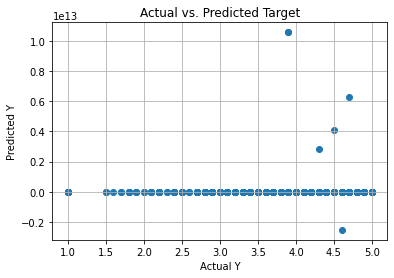

In [49]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

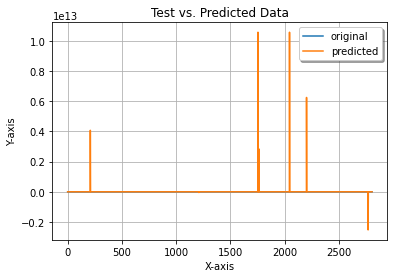

In [50]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lin_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [51]:
print("SGD Regression:Diabetes Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared on Train:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy on Test:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = sgd_mse*(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression:Diabetes Prediction
R-squared on Train: -57610038.284660235
SGD Regressor Model Accuracy on Test: -3814818180.934139 %

MAE: 326.29292201561174
MSE: 10108406.355430955
RMSE: 5054203.1777154775



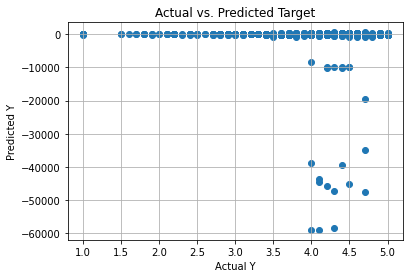

In [52]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

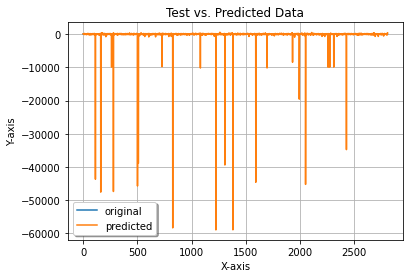

In [53]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [54]:
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+--------------+--------------+
|    | Comparison Matrix         | LR Model     | SGD Model    |
|----+---------------------------+--------------+--------------|
| 0  | Accuracy (Variance Score) | -3.96057e+25 | -3.81482e+09 |
| 1  | R2 Score                  | 0.0223761    | -5.761e+07   |
| 2  | MAE                       | 1.31299e+10  | 326.293      |
| 3  | MSE                       | 1.04493e+23  | 1.01084e+07  |
| 4  | RMSE                      | 5.22465e+22  | 5.0542e+06   |
+----+---------------------------+--------------+--------------+


In [55]:
prediction_table = pd.DataFrame(columns=["LR Predicted Value", "SGD Predicted Value"])
prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred

print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+------+----------------------+-----------------------+
|      | LR Predicted Value   | SGD Predicted Value   |
|------+----------------------+-----------------------|
| 0    | 4.19169              | 61.2417               |
| 1    | 4.35185              | -11.8758              |
| 2    | 4.13114              | 65.7979               |
| 3    | 4.17411              | 42.1852               |
| 4    | 4.09599              | 53.9008               |
| 5    | 4.15946              | 75.2251               |
| 6    | 3.98075              | 81.3207               |
| 7    | 4.26981              | -82.0575              |
| 8    | 4.13896              | 57.6077               |
| 9    | 4.16239              | -79.4572              |
| 10   | 4.15849              | 21.9371               |
| 11   | 4.16483              | 60.033                |
| 12   | 4.13896              | 170.118               |
| 13   | 4.20292              | -128.77               |
| 14   | 4.23075              | 164.423         